In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
countries = pd.read_csv("C:\\Users\\SRath\\Desktop\\Assignments\\Principal Component Analysis (PCA)\\Assignment_Clustering_PCA\\Country-data.csv")

countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [52]:
countries.shape

(167, 10)

### Data consistency checks
-  Checks for null data
-  Checks the datatype of all the columns
-  Calculate the percentage null columnwise in the dataset

In [53]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [54]:
round(100 * (countries.isnull().sum()/len(countries.index)),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

#### Null Check Conclusion: 
-  There seems to be No Null values in the dataset.

### Outlier checks

In [55]:
outlier_chk = countries[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

outlier_chk.describe(percentiles = [.05,.1,.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
10%,4.200000,15.660000,3.726000,22.520000,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000


### Outliers Handling:

#### Outlier check for gdpp:
-  We observed that there are outliers present in gdpp and we decide to remove the outliers above 95 percentile as it doesn't matter to our analysis as they don't belong to poor set of countries.

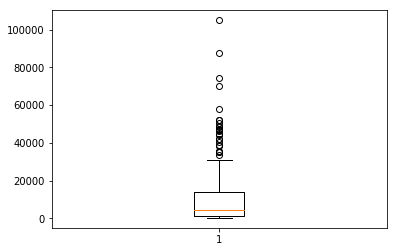

In [56]:
plt.boxplot(outlier_chk.gdpp)
plt.show()

In [57]:
qup = countries.gdpp.quantile(0.95)

In [58]:
countries = countries[(countries.gdpp <= qup)]

In [59]:
countries.shape

(158, 10)

In [60]:
outlier_chk = countries[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

outlier_chk.describe(percentiles = [.05,.1,.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,39.447462,6.688671,46.378265,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,25.243334,2.683807,23.229783,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.885000,11.970000,2.829500,17.770000,1207.000000,0.226300,55.510000,1.387000,457.050000
10%,4.500000,15.210000,3.737000,22.540000,1479.000000,0.664000,57.640000,1.440000,586.900000
25%,10.300000,23.575000,4.872500,30.475000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,34.000000,6.105000,43.250000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,50.675000,8.250000,58.475000,20100.000000,11.175000,76.400000,4.200000,12075.000000
90%,103.100000,68.030000,10.560000,72.110000,36200.000000,16.850000,80.030000,5.346000,31670.000000


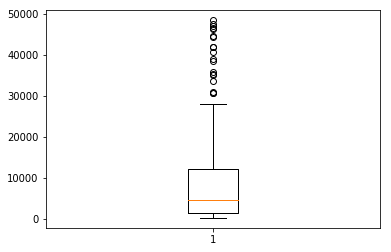

In [61]:
plt.boxplot(outlier_chk.gdpp)
plt.show()

#### Outlier check for income:
-  We observed that there are outliers present in income and we decide to remove the outliers above 95 percentile as it doesn't matter to our analysis as they don't belong to poor set of countries.

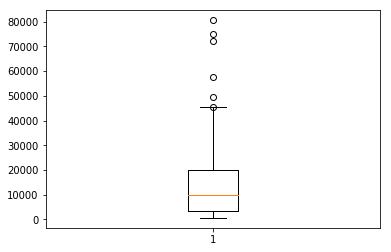

In [62]:
plt.boxplot(outlier_chk.income)
plt.show()

In [63]:
qup = outlier_chk.income.quantile(0.95)

In [64]:
countries = countries[(countries.income <= qup)]

In [67]:
countries.shape

(150, 10)

In [68]:
outlier_chk = countries[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

outlier_chk.describe(percentiles = [.05,.1,.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,41.862000,37.612660,6.718400,45.959773,12269.086667,8.029687,69.532000,3.061467,8513.426667
std,41.022172,21.536727,2.481361,21.106109,11133.537037,10.919868,8.785332,1.550472,11183.385699
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.230000,231.000000
5%,3.900000,11.890000,3.147000,18.295000,1199.000000,0.274450,55.270000,1.390000,451.850000
10%,4.590000,15.270000,3.970000,22.580000,1429.000000,0.670000,57.480000,1.458000,573.800000
25%,10.450000,22.975000,5.002500,30.725000,2977.500000,2.010000,63.200000,1.815000,1295.000000
50%,24.100000,32.650000,6.215000,43.300000,8955.000000,5.445000,71.350000,2.585000,4115.000000
75%,63.375000,50.000000,8.250000,58.475000,17950.000000,10.475000,76.300000,4.322500,10700.000000
90%,108.100000,66.050000,10.410000,71.370000,29680.000000,16.660000,80.000000,5.364000,23750.000000


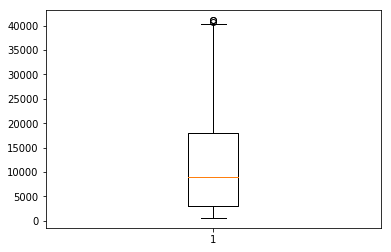

In [70]:
plt.boxplot(outlier_chk.income)
plt.show()

#### Standardization of Parameters

In [72]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [73]:
from sklearn.preprocessing  import StandardScaler

standard_scaler = StandardScaler()

num_vars = ['child_mort','exports','health','imports','income', 'inflation','life_expec','total_fer', 'gdpp']

countries[num_vars] = standard_scaler.fit_transform(countries[num_vars])

countries.head()

C:\Users\SRath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SRath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.182286,-1.286415,0.348392,-0.050380,-0.960593,0.129584,-1.522613,1.785117,-0.714193
1,Albania,-0.617876,-0.447833,-0.068093,0.125512,-0.210798,-0.325237,0.772956,-0.913396,-0.396861
2,Algeria,-0.356168,0.036680,-1.030458,-0.692148,0.056858,0.741524,0.795797,-0.110960,-0.363665
3,Angola,1.886697,1.150130,-1.564206,-0.145457,-0.573980,1.320387,-1.077204,2.005140,-0.447103
4,Antigua and Barbuda,-0.771966,0.367454,-0.278358,0.615157,0.615599,-0.605480,0.830060,-0.602776,0.330752


#### Applying PCA on the dataset
-  importing PCA and applying on the standardized dataset.

In [74]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver="randomized", random_state=42)

In [75]:
# Dropping countries before applying PCA on the standardized dataset

countries_norm = countries.drop('country', axis=1)

In [76]:
pca.fit(countries_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [77]:
pca.components_.round(2)

array([[ 0.43, -0.21, -0.18, -0.09, -0.43,  0.19, -0.43,  0.41, -0.39],
       [ 0.03,  0.6 , -0.1 ,  0.72, -0.13, -0.16, -0.13,  0.  , -0.21],
       [-0.21,  0.24, -0.74, -0.2 ,  0.  ,  0.46,  0.22, -0.18, -0.17],
       [ 0.28,  0.32,  0.19,  0.04,  0.37,  0.62, -0.14,  0.29,  0.39],
       [-0.28, -0.15,  0.51,  0.22, -0.3 ,  0.56,  0.16, -0.22, -0.34],
       [ 0.19, -0.04, -0.01, -0.05,  0.14,  0.07, -0.61, -0.75, -0.  ],
       [ 0.04, -0.61, -0.34,  0.61,  0.05,  0.14,  0.05, -0.01,  0.33],
       [ 0.76,  0.04,  0.04,  0.01, -0.07, -0.02,  0.58, -0.29, -0.08],
       [ 0.03, -0.19,  0.01,  0.1 ,  0.74, -0.02,  0.03,  0.12, -0.62]])

#### Explained variance Ratios:

In [79]:
pca.explained_variance_ratio_.round(2)

array([0.46, 0.18, 0.13, 0.1 , 0.07, 0.03, 0.02, 0.01, 0.  ])

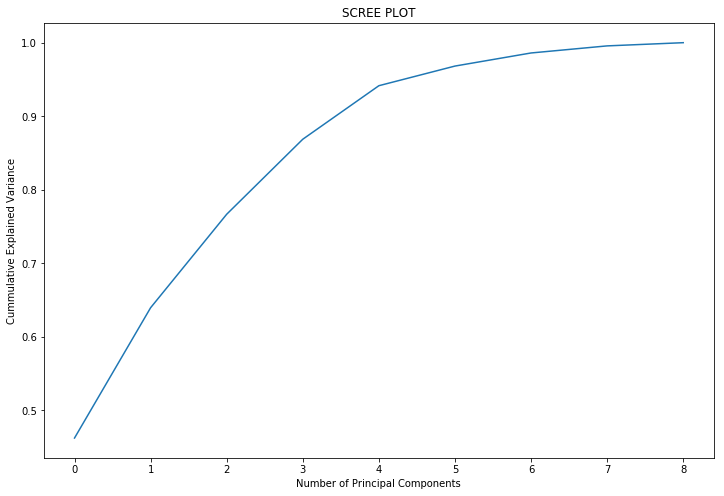

In [80]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cummulative Explained Variance')
plt.title('SCREE PLOT')


plt.show()

### Observations:
-  Based on the variance ratios and Screeplot we understand that with 3 to 4 Principal components we'll be able to explain 90-95% of data.

In [81]:
colnames = list(countries_norm.columns)

In [86]:
pcs_df = pd.DataFrame({'PC1': pca.components_[0], 'PC2': pca.components_[1], 'PC3': pca.components_[2], 'PC4': pca.components_[3], 'features': colnames})


pcs_df

,PC1,PC2,PC3,PC4,features
0,0.427997,0.029887,-0.212648,0.282429,child_mort
1,-0.209960,0.604894,0.235957,0.319446,exports
2,-0.184840,-0.102240,-0.736232,0.192457,health
3,-0.094636,0.719154,-0.198449,0.042356,imports
4,-0.429074,-0.125619,0.003263,0.367401,income
5,0.191168,-0.164472,0.456814,0.620715,inflation
6,-0.427897,-0.133800,0.219839,-0.143403,life_expec
7,0.413374,0.000716,-0.177530,0.287463,total_fer
8,-0.393686,-0.211756,-0.170734,0.394821,gdpp


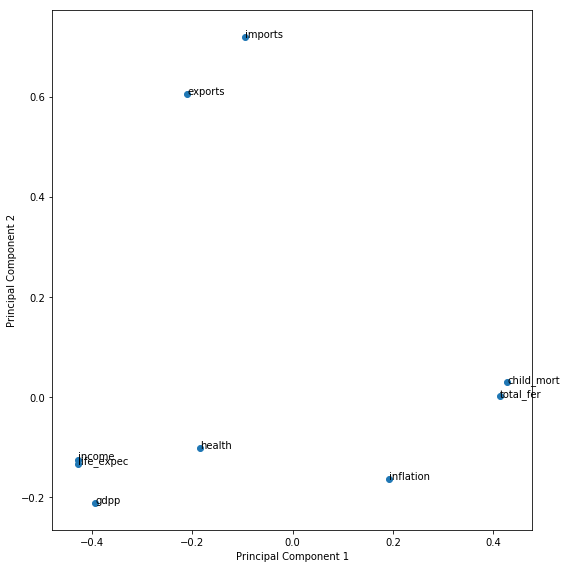

In [90]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))


plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

for i, txt in enumerate(pcs_df.features):
    plt.annotate(txt, (pcs_df.PC1[i], pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

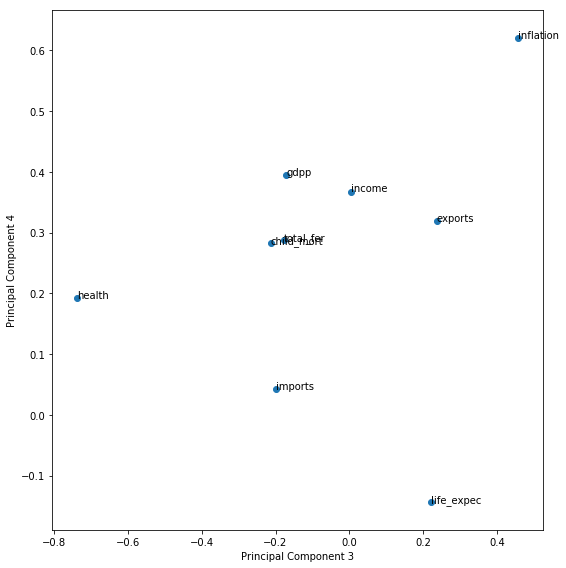

In [91]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))


plt.scatter(pcs_df.PC3, pcs_df.PC4)
plt.xlabel("Principal Component 3")
plt.ylabel("Principal Component 4")

for i, txt in enumerate(pcs_df.features):
    plt.annotate(txt, (pcs_df.PC3[i], pcs_df.PC4[i]))
plt.tight_layout()
plt.show()

In [95]:
from sklearn.decomposition import IncrementalPCA   

pca_final = IncrementalPCA(n_components= 4)


good_pca = pca_final.fit_transform(countries_norm)


good_pca.shape

(150, 4)

In [96]:
pc = np.transpose(good_pca)

In [99]:
good_pca_df = pd.DataFrame({'PC1': pc[0], 'PC2': pc[1], 'PC3': pc[2], 'PC4': pc[3]})




good_pca_df.head()

,PC1,PC2,PC3,PC4
0,-2.824567,-0.368462,1.272981,0.094172
1,0.692647,-0.131092,-0.347292,-1.205543
2,0.032081,-0.526432,-1.572665,-0.048081
3,-2.831370,0.909745,-1.068510,2.006737
4,1.527442,0.506543,-0.338746,-0.367792


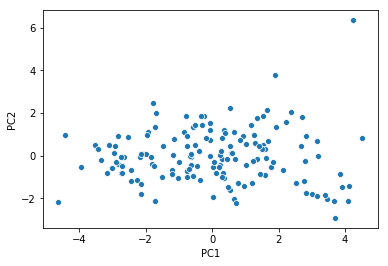

In [101]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = good_pca_df)
plt.show()

### Hopkin's Statistics:
-  To identify the clustering tendency of the dataset.

In [103]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_x = sample(range(0,n,1),m)
    
    ujd = []
    wjd = []
    for j in range(0,m):
        u_dist,_ = nbrs.kneighbors(uniform(np.amin(X,axis=0), np.amax(X,axis=0),d).reshape(1,-1),2,return_distance = True)
        ujd.append(u_dist[0][1])
        w_dist,_ = nbrs.kneighbors(X.iloc[rand_x[j]].values.reshape(1,-1),2,return_distance = True)
        wjd.append(w_dist[0][1])
        
    H = sum(ujd)/(sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd,wjd)
        H = 0
        
    return H

In [104]:
hopkins(good_pca_df)

0.8320368498020679

#### Observation from Hopkin's Statistics:
-  0.83 is pretty good a value (> 0.5) and shows high tendency to cluster

#### Silhouette Score Analysis:

In [108]:
from sklearn.cluster import KMeans

In [109]:
sil_df = good_pca_df

In [110]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(sil_df)
    sse_.append([k, silhouette_score(sil_df, kmeans.labels_)])

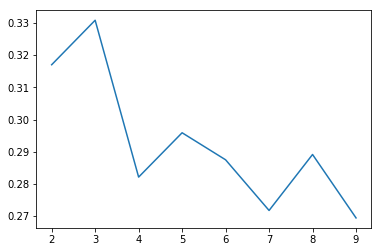

In [111]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

#### Observation from Silhouette Analysis:
-  The maximum value is obtained when K = 3.
-  We find that 3 seems to be a good number of clusters for KMeans algorithm

#### Sum of Squared Distances: Elbow Curve

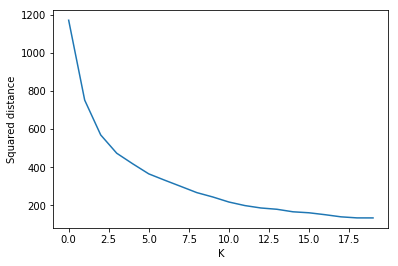

In [113]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters= num_clusters, max_iter=50)
    model_clus.fit(sil_df)
    ssd.append(model_clus.inertia_)

plt.xlabel('K')
plt.ylabel('Squared distance')
plt.plot(ssd)

#### Observation:
-  As K increases, the sum of squared distances drop. 
-  Elbow of the plot is at K between 2.5 and 3

## KMeans using K = 3

In [114]:
model_clus = KMeans(n_clusters= 3, max_iter= 50, random_state= 50)

model_clus.fit(sil_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [115]:
dat4 = good_pca_df

In [116]:
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus.labels_)], axis = 1)
dat_km.columns = ['PC1','PC2','PC3','PC4','Cluster_ID']
dat_km.head()

,PC1,PC2,PC3,PC4,Cluster_ID
0,-2.824567,-0.368462,1.272981,0.094172,1
1,0.692647,-0.131092,-0.347292,-1.205543,0
2,0.032081,-0.526432,-1.572665,-0.048081,0
3,-2.831370,0.909745,-1.068510,2.006737,1
4,1.527442,0.506543,-0.338746,-0.367792,0


In [117]:
dat_km['Cluster_ID'].value_counts()

0    78
1    50
2    22
Name: Cluster_ID, dtype: int64

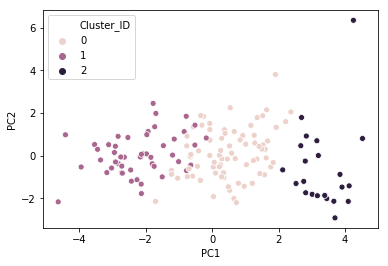

In [118]:
sns.scatterplot(x = 'PC1', y = 'PC2',hue = 'Cluster_ID', legend='full', data = dat_km)

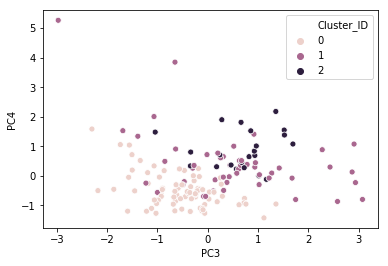

In [121]:
sns.scatterplot(x = 'PC3', y = 'PC4',hue = 'Cluster_ID', legend='full', data = dat_km)

In [136]:
countries.reset_index(inplace= True)

In [138]:
dat5 = pd.concat([countries, dat_km], axis = 1)

dat5.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,Cluster_ID
0,0,Afghanistan,1.182286,-1.286415,0.348392,-0.050380,-0.960593,0.129584,-1.522613,1.785117,-0.714193,-2.824567,-0.368462,1.272981,0.094172,1
1,1,Albania,-0.617876,-0.447833,-0.068093,0.125512,-0.210798,-0.325237,0.772956,-0.913396,-0.396861,0.692647,-0.131092,-0.347292,-1.205543,0
2,2,Algeria,-0.356168,0.036680,-1.030458,-0.692148,0.056858,0.741524,0.795797,-0.110960,-0.363665,0.032081,-0.526432,-1.572665,-0.048081,0
3,3,Angola,1.886697,1.150130,-1.564206,-0.145457,-0.573980,1.320387,-1.077204,2.005140,-0.447103,-2.831370,0.909745,-1.068510,2.006737,1
4,4,Antigua and Barbuda,-0.771966,0.367454,-0.278358,0.615157,0.615599,-0.605480,0.830060,-0.602776,0.330752,1.527442,0.506543,-0.338746,-0.367792,0


In [139]:
#countries.to_excel('mytest.xlsx')

In [140]:
dat6 = dat5.drop(['PC1','PC2','PC3','PC4'], axis = 1)

dat6.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,0,Afghanistan,1.182286,-1.286415,0.348392,-0.050380,-0.960593,0.129584,-1.522613,1.785117,-0.714193,1
1,1,Albania,-0.617876,-0.447833,-0.068093,0.125512,-0.210798,-0.325237,0.772956,-0.913396,-0.396861,0
2,2,Algeria,-0.356168,0.036680,-1.030458,-0.692148,0.056858,0.741524,0.795797,-0.110960,-0.363665,0
3,3,Angola,1.886697,1.150130,-1.564206,-0.145457,-0.573980,1.320387,-1.077204,2.005140,-0.447103,1
4,4,Antigua and Barbuda,-0.771966,0.367454,-0.278358,0.615157,0.615599,-0.605480,0.830060,-0.602776,0.330752,0


In [160]:
dat6.shape

(150, 12)

In [161]:
clu_chld_mort = pd.DataFrame(dat6.groupby(['Cluster_ID']).child_mort.mean())
clu_exports = pd.DataFrame(dat6.groupby(['Cluster_ID']).exports.mean())
clu_health = pd.DataFrame(dat6.groupby(['Cluster_ID']).health.mean())
clu_imports = pd.DataFrame(dat6.groupby(['Cluster_ID']).imports.mean())
clu_income = pd.DataFrame(dat6.groupby(['Cluster_ID']).income.mean())
clu_inflation = pd.DataFrame(dat6.groupby(['Cluster_ID']).inflation.mean())
clu_life_expec = pd.DataFrame(dat6.groupby(['Cluster_ID']).life_expec.mean())
clu_total_fer = pd.DataFrame(dat6.groupby(['Cluster_ID']).total_fer.mean())
clu_gdpp = pd.DataFrame(dat6.groupby(['Cluster_ID']).gdpp.mean())

In [162]:
df_countries = pd.concat([pd.Series([0,1,2]), clu_chld_mort, clu_exports,clu_health,clu_imports,clu_income, clu_inflation,clu_life_expec, clu_total_fer,clu_gdpp], axis = 1)

In [163]:
df_countries.columns = ['Cluster_ID', 'chld_mort', 'exports', 'health', 'imports','income', 'inflation','life_expec', 'total_fer','gdpp']

In [165]:
df_countries

,Cluster_ID,chld_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,-0.497025,0.124653,-0.242795,0.039130,-0.051009,-0.051073,0.397096,-0.530099,-0.219318
1,1,1.172356,-0.393968,-0.056044,-0.083657,-0.758683,0.342817,-1.137734,1.210340,-0.592912
2,2,-0.902265,0.453430,0.988192,0.051395,1.905129,-0.598050,1.177873,-0.871333,2.125110


#### Observations:
-  3rd Cluster (Cluster_ID = 2) seems to be a **GOOD Cluster** with respect to high gdpp, life_expectancy, child_income, health and average exports and imports with relatively low child_mortality.
-  1st Cluster (Cluster_ID = 0) seems to be a **BAD Cluster** with respect to low gdpp, low life expectancy, low inflation and very low child income. It has low import and exports as well.

In [166]:
dat6.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,0,Afghanistan,1.182286,-1.286415,0.348392,-0.050380,-0.960593,0.129584,-1.522613,1.785117,-0.714193,1
1,1,Albania,-0.617876,-0.447833,-0.068093,0.125512,-0.210798,-0.325237,0.772956,-0.913396,-0.396861,0
2,2,Algeria,-0.356168,0.036680,-1.030458,-0.692148,0.056858,0.741524,0.795797,-0.110960,-0.363665,0
3,3,Angola,1.886697,1.150130,-1.564206,-0.145457,-0.573980,1.320387,-1.077204,2.005140,-0.447103,1
4,4,Antigua and Barbuda,-0.771966,0.367454,-0.278358,0.615157,0.615599,-0.605480,0.830060,-0.602776,0.330752,0


### Plotting Important variables which clearly segment these 3 clusters

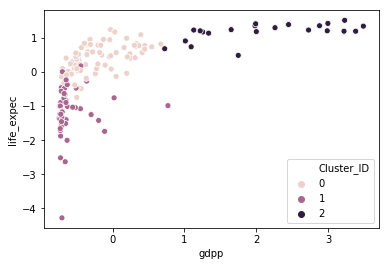

In [217]:
sns.scatterplot(x = 'gdpp',y = 'life_expec',hue = 'Cluster_ID', data = dat6)

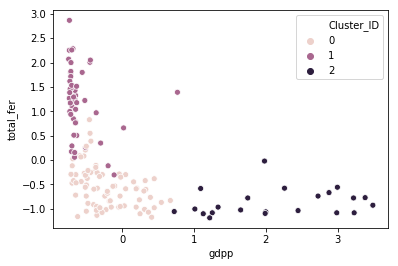

In [218]:
sns.scatterplot(x = 'gdpp',y = 'total_fer',hue = 'Cluster_ID', data = dat6)

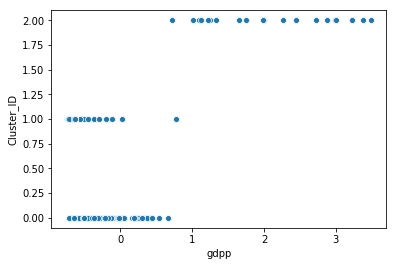

In [226]:
sns.scatterplot(x = 'gdpp',y = 'Cluster_ID', data = dat6)

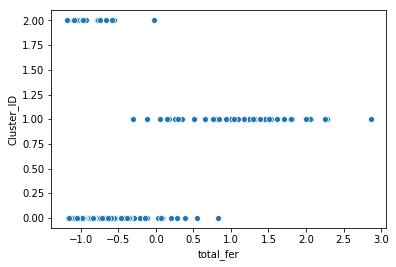

In [227]:
sns.scatterplot(x = 'total_fer',y = 'Cluster_ID', data = dat6)

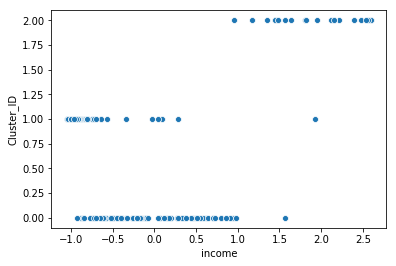

In [223]:
sns.scatterplot(x = 'income',y = 'Cluster_ID', data = dat6)

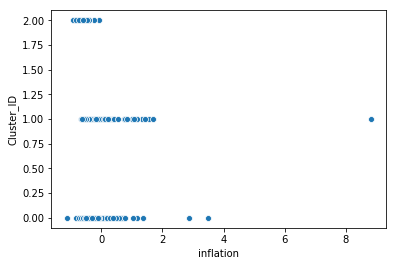

In [224]:
sns.scatterplot(x = 'inflation',y = 'Cluster_ID', data = dat6)

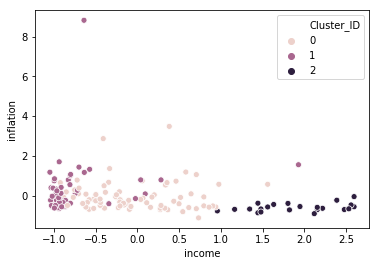

In [225]:
sns.scatterplot(x = 'income',y = 'inflation',hue = 'Cluster_ID', data = dat6)

In [170]:
df_countries

,Cluster_ID,chld_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,-0.497025,0.124653,-0.242795,0.039130,-0.051009,-0.051073,0.397096,-0.530099,-0.219318
1,1,1.172356,-0.393968,-0.056044,-0.083657,-0.758683,0.342817,-1.137734,1.210340,-0.592912
2,2,-0.902265,0.453430,0.988192,0.051395,1.905129,-0.598050,1.177873,-0.871333,2.125110


#### Binning based on the mean values of the Cluster 0 (BAD CLUSTER )

In [171]:
fin = countries[countries['gdpp'] <= -0.219318]
fin = fin[fin['total_fer'] <= -0.530099]
fin = fin[fin['inflation'] <= -0.051073]
fin = fin[fin['income'] <= -0.051009]

fin

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,1,Albania,-0.617876,-0.447833,-0.068093,0.125512,-0.210798,-0.325237,0.772956,-0.913396,-0.396861
18,20,Bosnia and Herzegovina,-0.855126,-0.368634,1.771721,0.253866,-0.229723,-0.609155,0.830060,-1.133419,-0.350207
31,34,China,-0.639889,-0.527033,-0.666538,-1.110486,-0.246845,-0.100124,0.578803,-0.952224,-0.354693
85,92,"Macedonia, FYR",-0.769520,0.101903,0.150258,0.577127,-0.078322,-0.550350,0.510279,-1.029879,-0.356488
137,152,Tunisia,-0.598309,0.600394,-0.205574,0.444019,-0.168441,-0.386799,0.841480,-0.596305,-0.392375


### Hierarchial Clustering on the same dataset after Outlier handling and Standardisation

In [203]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [204]:
mergings = linkage(good_pca_df, method = "complete", metric = "euclidean")

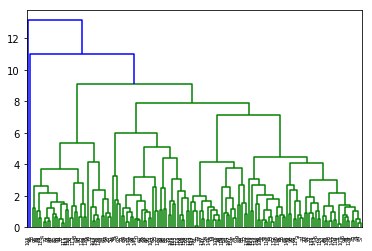

<Figure size 5760x3600 with 0 Axes>

In [205]:
dendrogram(mergings)
plt.figure(figsize=(80,50))
plt.show()

In [207]:
cluster_cut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))

cluster_cut.shape

(150,)

In [208]:
countries.drop('index', axis = 1, inplace = True)

KeyError: "['index'] not found in axis"

In [209]:
countries.shape

(150, 10)

In [210]:
countries_hc = pd.concat([countries, cluster_cut], axis = 1)


countries_hc.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp','hier_cluster']

countries_hc.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hier_cluster
0,Afghanistan,1.182286,-1.286415,0.348392,-0.050380,-0.960593,0.129584,-1.522613,1.785117,-0.714193,0
1,Albania,-0.617876,-0.447833,-0.068093,0.125512,-0.210798,-0.325237,0.772956,-0.913396,-0.396861,0
2,Algeria,-0.356168,0.036680,-1.030458,-0.692148,0.056858,0.741524,0.795797,-0.110960,-0.363665,0
3,Angola,1.886697,1.150130,-1.564206,-0.145457,-0.573980,1.320387,-1.077204,2.005140,-0.447103,0
4,Antigua and Barbuda,-0.771966,0.367454,-0.278358,0.615157,0.615599,-0.605480,0.830060,-0.602776,0.330752,0
5,Argentina,-0.669240,-0.871783,0.558657,-1.424239,0.579551,1.182563,0.715852,-0.447466,0.160288,0
6,Armenia,-0.581188,-0.783266,-0.937456,-0.031365,-0.501884,-0.023861,0.430334,-0.887511,-0.474915,0
7,Azerbaijan,-0.065109,0.777428,-0.339011,-1.200808,0.336228,0.530194,-0.049338,-0.738672,-0.239854,0
8,Bahamas,-0.686361,-0.121718,0.473742,-0.107426,0.958054,-0.773902,0.487437,-0.777500,1.748295,0
9,Bahrain,-0.813546,1.485563,-0.706974,0.234850,2.598231,-0.054182,0.738694,-0.583362,1.093354,0


In [211]:
clu_chld_mort = pd.DataFrame(countries_hc.groupby(['hier_cluster']).child_mort.mean())
clu_exports = pd.DataFrame(countries_hc.groupby(['hier_cluster']).exports.mean())
clu_health = pd.DataFrame(countries_hc.groupby(['hier_cluster']).health.mean())
clu_imports = pd.DataFrame(countries_hc.groupby(['hier_cluster']).imports.mean())
clu_income = pd.DataFrame(countries_hc.groupby(['hier_cluster']).income.mean())
clu_inflation = pd.DataFrame(countries_hc.groupby(['hier_cluster']).inflation.mean())
clu_life_expec = pd.DataFrame(countries_hc.groupby(['hier_cluster']).life_expec.mean())
clu_total_fer = pd.DataFrame(countries_hc.groupby(['hier_cluster']).total_fer.mean())
clu_gdpp = pd.DataFrame(countries_hc.groupby(['hier_cluster']).gdpp.mean())

In [212]:
clu_chld_mort

,child_mort
hier_cluster,
0,-0.008771
1,-0.857572
2,2.155743


In [213]:
df_countries_hc = pd.concat([pd.Series([0,1,2]), clu_chld_mort, clu_exports,clu_health,clu_imports,clu_income, clu_inflation,clu_life_expec, clu_total_fer,clu_gdpp], axis = 1)

In [214]:
df_countries_hc.columns = ['Cluster_ID', 'chld_mort', 'exports', 'health', 'imports','income', 'inflation','life_expec', 'total_fer','gdpp']

In [215]:
df_countries_hc

,Cluster_ID,chld_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,-0.008771,-0.032446,-0.000774,-0.025530,-0.005427,-0.056974,-0.001340,-0.004709,-0.003882
1,1,-0.857572,5.375650,0.781052,5.136057,1.444700,-0.385880,1.229786,-1.101062,1.129241
2,2,2.155743,-0.573621,-0.666538,-1.357685,-0.641569,8.818039,-1.031521,1.798060,-0.554764


#### Observation:
-  The Cluster 0 is the **BAD Cluster** with all the features having minimum values across all clusters

### Comparison of Kmeans Cluster and Hierarchial Clusters

In [229]:
new_hc_clus = countries_hc[['country', 'hier_cluster']]

compare_km_hc = pd.merge(dat6, new_hc_clus, how = 'inner', on = 'country')

compare_km_hc.rename(columns = {'Cluster_ID':'km_clusters'}, inplace = True)
compare_km_hc.head(20)

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,km_clusters,hier_cluster
0,0,Afghanistan,1.182286,-1.286415,0.348392,-0.050380,-0.960593,0.129584,-1.522613,1.785117,-0.714193,1,0
1,1,Albania,-0.617876,-0.447833,-0.068093,0.125512,-0.210798,-0.325237,0.772956,-0.913396,-0.396861,0,0
2,2,Algeria,-0.356168,0.036680,-1.030458,-0.692148,0.056858,0.741524,0.795797,-0.110960,-0.363665,0,0
3,3,Angola,1.886697,1.150130,-1.564206,-0.145457,-0.573980,1.320387,-1.077204,2.005140,-0.447103,1,0
4,4,Antigua and Barbuda,-0.771966,0.367454,-0.278358,0.615157,0.615599,-0.605480,0.830060,-0.602776,0.330752,0,0
5,5,Argentina,-0.669240,-0.871783,0.558657,-1.424239,0.579551,1.182563,0.715852,-0.447466,0.160288,0,0
6,6,Armenia,-0.581188,-0.783266,-0.937456,-0.031365,-0.501884,-0.023861,0.430334,-0.887511,-0.474915,0,0
7,9,Azerbaijan,-0.065109,0.777428,-0.339011,-1.200808,0.336228,0.530194,-0.049338,-0.738672,-0.239854,0,0
8,10,Bahamas,-0.686361,-0.121718,0.473742,-0.107426,0.958054,-0.773902,0.487437,-0.777500,1.748295,2,0
9,11,Bahrain,-0.813546,1.485563,-0.706974,0.234850,2.598231,-0.054182,0.738694,-0.583362,1.093354,2,0


In [230]:
df_countries_hc

,Cluster_ID,chld_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,-0.008771,-0.032446,-0.000774,-0.025530,-0.005427,-0.056974,-0.001340,-0.004709,-0.003882
1,1,-0.857572,5.375650,0.781052,5.136057,1.444700,-0.385880,1.229786,-1.101062,1.129241
2,2,2.155743,-0.573621,-0.666538,-1.357685,-0.641569,8.818039,-1.031521,1.798060,-0.554764


#### Binning based on the mean values of the Cluster 0 (BAD CLUSTER )

In [252]:
finhc = countries[countries['inflation'] <= -0.056974]
finhc = finhc[finhc['imports'] <= -0.025530]
finhc = finhc[finhc['health'] <= -0.000774]
finhc = finhc[finhc['child_mort'] <= -0.008771]

finhc

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,China,-0.639889,-0.527033,-0.666538,-1.110486,-0.246845,-0.100124,0.578803,-0.952224,-0.354693
41,Dominican Republic,-0.182511,-0.694749,-0.201530,-0.601825,-0.105358,-0.237948,0.578803,-0.298627,-0.274844
98,Morocco,-0.204524,-0.252164,-0.613972,-0.140703,-0.525315,-0.648114,0.453175,-0.311569,-0.509905
109,Peru,-0.527379,-0.457151,-0.662495,-1.053440,-0.208094,-0.213140,0.955688,-0.337454,-0.313423
110,Philippines,-0.243658,-0.131036,-1.256896,-0.444948,-0.601016,-0.350045,-0.060758,0.063763,-0.572708
113,Romania,-0.742616,-0.233529,-0.460317,-0.340364,0.498444,-0.413445,0.476017,-0.952224,-0.025428
